# Project: Investigate a Dataset - TMDB Movies Analysis

Created by:
<ul>
    <li>Remie I. Dillon</li>
    <li>D496 - Intro to Data Science</li>
    <li>Western Governors University</li>
</ul>




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'>  </a>

## Introduction

### Dataset Description 

The TMDb Movies Dataset contains information about 10,866 movies, collected from The Movie Database (TMDb).

The dataset includes the following columns:

>Column Name - Description
>
>id - Unique identifier for each movie.
>
>imdb_id - Corresponding IMDb ID for the movie.
>
>popularity - TMDb popularity score (calculated based on user interactions).
>
>budget - Budget of the movie in USD (not adjusted for inflation).
>
>revenue - Revenue of the movie in USD (not adjusted for inflation).
>
>original_title - Original title of the movie.
>
>cast - List of main actors.
>
>homepage - Official homepage URL of the movie.
>
>director - Name of the movie's director.
>
>tagline - Tagline.
>
>keywords - Keywords associated with the movie.
>
>overview - A short description of the movie.
>
>runtime - Duration of the movie in minutes.
>
>genres - Movie genres.
>
>production_companies - List of production companies that financed the movie.
>
>release_date - Date the movie was released.
>
>vote_count - Number of user votes on TMDb.
>
>vote_average - Average rating of the movie (scale: 0-10).
>
>release_year - Year the movie was released.
>
>budget_adj - Adjusted budget (accounting for inflation in 2010 dollars).
>
>revenue_adj - Adjusted revenue (accounting for inflation in 2010 dollars).
>
This project will showcase the exploration and visualization of the 'tmdb-movies.csv' dataset. Before diving into the data in an exploratory fasion, I am excited to find and discover insights within the dataset, as well as practice what I have learned in the previous lessons. Questions and topics I am initially interested in are; what actors were in the highest earning films, can I find a correlation between movies and years they were released, are actors of a certain age group generally more successful, what genres are most popular, what attributes are associated with a high-revenue movie, does a high budget correalate with a high revenue?


### Defining The Research Questions 

I will investigate:

1. What are the most popular genres in the dataset?
2. What factors influence movie revenue?
    - Investigating budget, vote average, and runtime in relation to revenue.
  

<hr>


<a id='wrangling'></a>
## Data Wrangling


In [1]:
#Loading my initial packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this will set the backgrounds to a grey for better visibility
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style(style="dark")

The following cell will be used to import my dataset, and perform my initial assessment. 

In [2]:
df = pd.read_csv('tmdb-movies.csv')

print('Dataset Shape:', df.shape)
print('\nColumn Names:', df.columns.tolist())

# Lets find some initial erroneous data
print('\nDuplicated Rows:\n', df.duplicated().sum())

df.head(3)

Dataset Shape: (10866, 21)

Column Names: ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']

Duplicated Rows:
 1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


I decided to create a function that allows me to see my dataframe health. Showing missing, zero, and unique values in a side by side format. 

In [3]:
def data_health_view(data):
    
    summary = pd.DataFrame({
        "Zero Values": (data == 0).sum(),
        "Missing Values": data.isnull().sum(),
        "Unique Values": data.nunique()
    })
    return summary

health_summary = data_health_view(df)
print(health_summary)

                      Zero Values  Missing Values  Unique Values
id                              0               0          10865
imdb_id                         0              10          10855
popularity                      0               0          10814
budget                       5696               0            557
revenue                      6016               0           4702
original_title                  0               0          10571
cast                            0              76          10719
homepage                        0            7930           2896
director                        0              44           5067
tagline                         0            2824           7997
keywords                        0            1493           8804
overview                        0               4          10847
runtime                        31               0            247
genres                          0              23           2039
production_companies     

<ul>
    <li>I do not like the datatype for the release date and year, I can adjust this later.</li>
    <li>Columns that have missing values: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies.</li>
    <li>There is one duplicated line, I will clean this later.</li>
    <li>During my first attempt at this project, I neglected to check to extreme outliers or erroneous values that did not appear because I only searched for NA/Null values. I really needed to check for 'zero' values in essential columns.</li>
    <li>Budget and revenue both have data that needs to be fixed.</li>
    <li>I am already thinking about starting to drop some columns I will not need. Such as: id, imbd_id, homepage, tagline, and overview.</li>
</ul>

Lets gather some more information about the dataset. 


In [4]:
df.describe(include='all')


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10856,10866.000000,1.086600e+04,1.086600e+04,10866,10790,2936,10822,8042,...,10862,10866.000000,10843,9836,10866,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
unique,NaN,10855,NaN,NaN,NaN,10571,10719,2896,5067,7997,...,10847,NaN,2039,7445,5909,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0411951,NaN,NaN,NaN,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,...,No overview found.,NaN,Comedy,Paramount Pictures,1/1/09,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,4,6,4,45,5,...,13,NaN,712,156,28,NaN,NaN,NaN,NaN,NaN
mean,66064.177434,NaN,0.646441,1.462570e+07,3.982332e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,102.070863,NaN,NaN,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,NaN,1.000185,3.091321e+07,1.170035e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,31.381405,NaN,NaN,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,NaN,0.000065,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,NaN,0.207583,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,90.000000,NaN,NaN,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,NaN,0.383856,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,NaN,NaN,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,NaN,0.713817,1.500000e+07,2.400000e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,111.000000,NaN,NaN,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07



## Data Cleaning

### After an initial exploration:
>The shape of our data is (10866, 21)
>
> Columns that have missing values: imdb_id, cast, 
    homepage, director, tagline, keywords, 
    overview, genres, production_companies
>
>There is 1 duplicate
>
>release_date is not in the datetime format
>
>budget and revenue have a lot of zero data that needs adjusted
 

### Data Cleaning Objectives
1. Drop unnecessary columns.
2. Handle missing values and duplicated values.
3. Convert data type of release_date.
4. Fix 'zero' data in budget and revenue




In [5]:

# Dropping unnecessary columns 
columns_to_drop = ['id', 'imdb_id', 'homepage', 'tagline', 'overview']
df_cleaned = df.drop(columns = columns_to_drop)

# Dropping duplicated values
df_cleaned = df_cleaned.drop_duplicates()

# Drop rows with missing values in essential columns
essential_columns = ['genres', 'director', 'runtime']
df_cleaned = df_cleaned.dropna(subset = essential_columns)

# Filling missing values in non-essential columns
df_cleaned['cast'] = df_cleaned['cast'].fillna('Unknown')
df_cleaned['keywords'] = df_cleaned['keywords'].fillna('Unknown')
df_cleaned['production_companies'] = df_cleaned['production_companies'].fillna('Unknown')

# Converting release_date to datetime
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], format='%m/%d/%y', errors = 'coerce')

# Replace zero values in 'budget' and 'revenue' with the median
budget_adj_median = df_cleaned[df_cleaned['budget_adj'] > 0]['budget_adj'].median()
revenue_adj_median = df_cleaned[df_cleaned['revenue_adj'] > 0]['revenue_adj'].median()

df_cleaned['budget_adj'] = df_cleaned['budget_adj'].replace(0, budget_adj_median)
df_cleaned['revenue_adj'] = df_cleaned['revenue_adj'].replace(0, revenue_adj_median)


In [6]:
# Verify the cleaning steps
print("Dataset after cleaning:", df_cleaned.shape)
print("\nRelease date sample:",df_cleaned["release_date"].iloc[0])

# Running my function again to verify cleaning steps
health_summary = data_health_view(df_cleaned)
print(health_summary)

Dataset after cleaning: (10800, 16)

Release date sample: 2015-06-09 00:00:00
                      Zero Values  Missing Values  Unique Values
popularity                      0               0          10750
budget                       5636               0            556
revenue                      5952               0           4702
original_title                  0               0          10507
cast                            0               0          10666
director                        0               0           5056
keywords                        0               0           8788
runtime                        28               0            245
genres                          0               0           2031
production_companies            0               0           7424
release_date                    0               0           5886
vote_count                      0               0           1289
vote_average                    0               0             71
release_year

I can see that there are still 28 zero values in the runtime column. I will be using this attribute in my analysis and it will skew my results. I have decided to drop the rows due to the bad actors being less than 10% of my total dataset. 

In [7]:
# This will make my dataframe only include rows where runtime is not 0
df_cleaned = df_cleaned[df_cleaned['runtime'] !=0 ]

# lets check our data health again with our fancy function!
health_summary = data_health_view(df_cleaned)
print(health_summary)

                      Zero Values  Missing Values  Unique Values
popularity                      0               0          10723
budget                       5611               0            555
revenue                      5924               0           4702
original_title                  0               0          10480
cast                            0               0          10639
director                        0               0           5039
keywords                        0               0           8780
runtime                         0               0            244
genres                          0               0           2029
production_companies            0               0           7416
release_date                    0               0           5883
vote_count                      0               0           1289
vote_average                    0               0             71
release_year                    0               0             56
budget_adj               

> I will not be using the unadjusted budget and revenue in my analysis, thus I wont bother cleaning them.
>
> Below is a final verification of the adjusted budget and revenue.

In [8]:
print(df_cleaned[['budget_adj', 'revenue_adj']].agg(['min', 'max', 'mean', 'median']))

          budget_adj   revenue_adj
min     9.210911e-01  2.370705e+00
max     4.250000e+08  2.827124e+09
mean    2.954451e+07  7.598924e+07
median  2.274082e+07  4.396405e+07


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 

- What are the most popular genres across all the years?

In this step I will analyze the most frequently produced movie genres. 

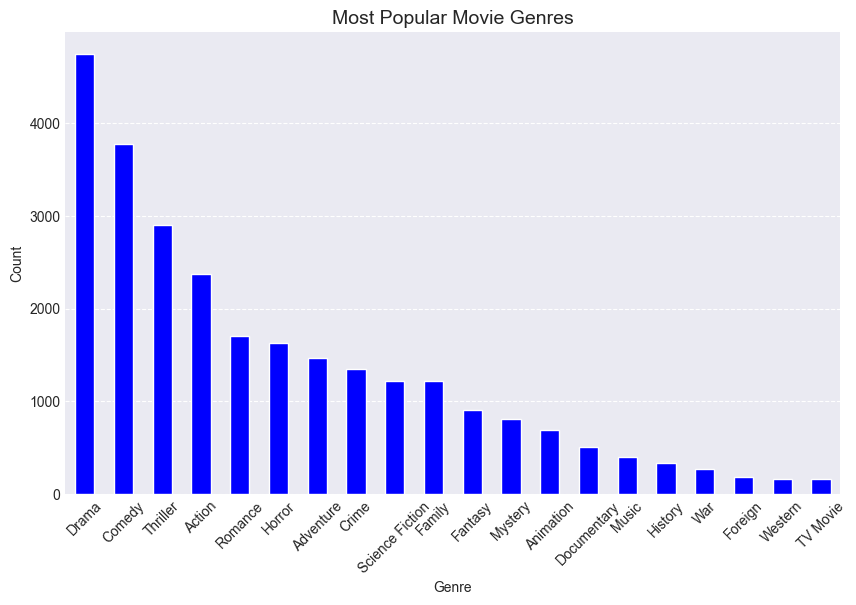

In [9]:
# start by splitting genres and counts

genre_list = df_cleaned['genres'].str.split('|').explode()
genre_counts = genre_list.value_counts()

# building the plot for most popular genres
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar', color='blue', alpha=1)
plt.title('Most Popular Movie Genres', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()
           



This visualization makes it very easy to see that our most produced movie genres are Drama, Comedy, and Thrillers. 
<hr>

### Research Question 2  

<ul>
    <li>What properties contribute to a high revenue movie?</li>
        <ul>
        <li> How does <strong>Budget</strong> correlate with Revenue?</li>
        <li> How does <strong>Runtime</strong> correlate with Revenue?</li>
        <li> How does <strong>Vote Average</strong> correlate with Revenue?</li></ul>

    
</ul>

    
    
    


### Budget vs Revenue

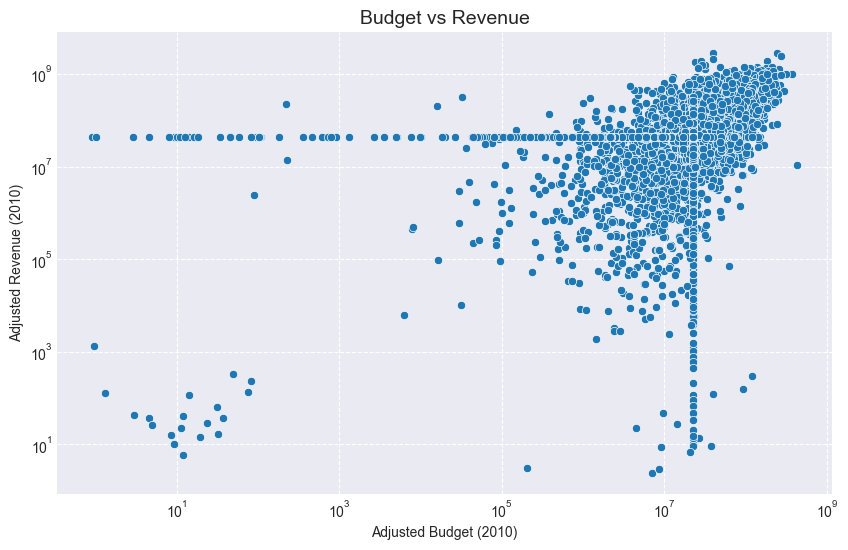

,budget_adj,revenue_adj
budget_adj,1.00000,0.59946
revenue_adj,0.59946,1.00000


In [10]:
# Creating a scatter plot outlining Budget vs Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cleaned['budget_adj'], y=df_cleaned['revenue_adj'], alpha=1)
# df_cleaned.plot(kind='scatter', 
plt.title('Budget vs Revenue', fontsize=14)
plt.xlabel('Adjusted Budget (2010)')
plt.ylabel('Adjusted Revenue (2010)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=1)
plt.show()

df_cleaned[['budget_adj', 'revenue_adj']].corr()

Our visualization shows a relatively high positive linear relationship between the budget and the revenue. On average, movies with a higher production budget tend to generate higher revenue. This does not imply causation, however it does seem like there is a good argument that a higher budget could help yield higher revenue.

### Runtime vs Revenue

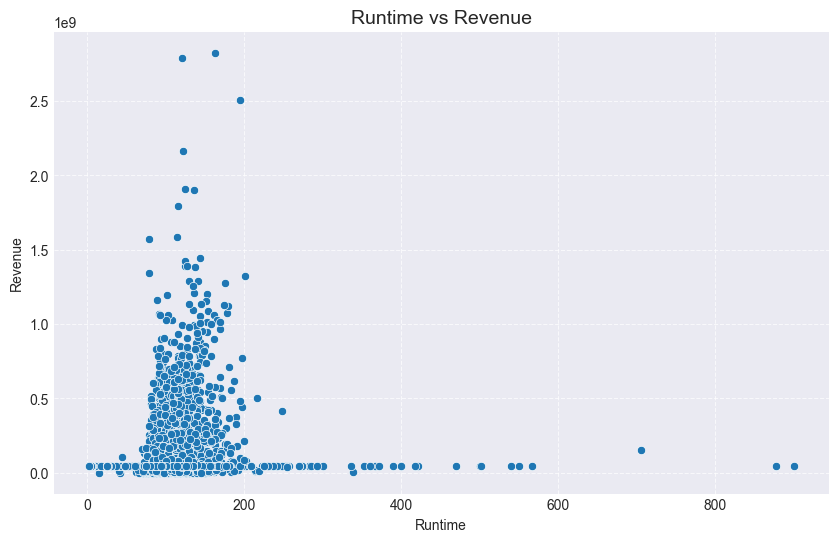

,runtime,revenue_adj
runtime,1.000000,0.161084
revenue_adj,0.161084,1.000000


In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cleaned['runtime'], y=df_cleaned['revenue_adj'],alpha=1)
plt.title('Runtime vs Revenue', fontsize = 14)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Lets compute the correlation between runtime and revenue
df_cleaned[['runtime', 'revenue_adj']].corr()


A correlation of 0.16 indicates a weak positive relationship between runtime and revenue. On average movies with a slightly longer runtime tend to generate a higher revenue, but the strength of this relationship is relatively weak. 

### Vote Average vs. Revenue

> Here I will analyze whether higher rated movies generate higher revenue. 

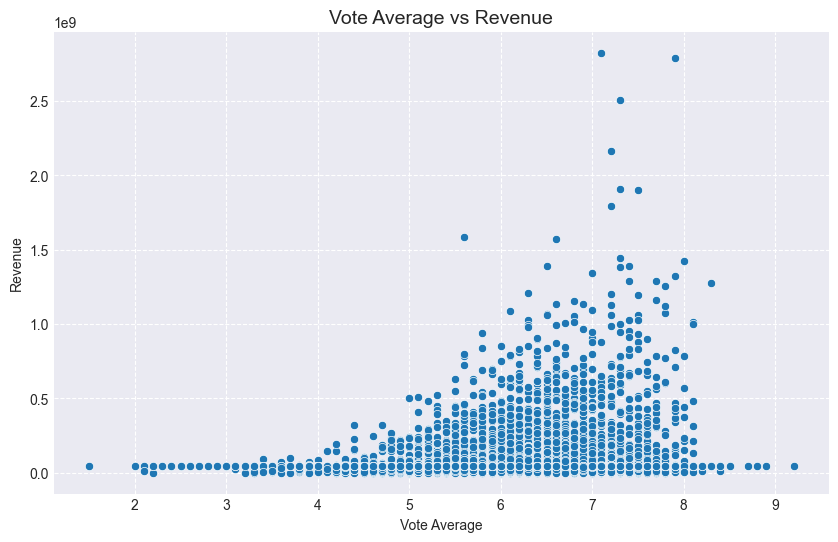

,vote_average,revenue_adj
vote_average,1.000000,0.178483
revenue_adj,0.178483,1.000000


In [12]:
# Scatterplot displaying vote_average and revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cleaned['vote_average'], y=df_cleaned['revenue_adj'], alpha=1)
plt.title('Vote Average vs Revenue', fontsize=14)
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.grid(True, linestyle= '--', alpha= 1)
plt.show()

#computing  correlation between vote average and revenue
df_cleaned[['vote_average', 'revenue_adj']].corr()


A correlation of 0.17 between vote average and revenue shows a weak positive linear relationship. There is a slight positive association between movies with a higher vote average earning marginally more revenue, but this relationship is fairly weak. There are likely other factors at play in earning a higher revenue than the vote average. 

### Multi-Variable Analysis

> This investigation will use the seaborn package to compare multiple variables together using a pair
> plot.
>
> While this does not directly support the analysis, I wanted to include this pair plot as a pleasant visual.  

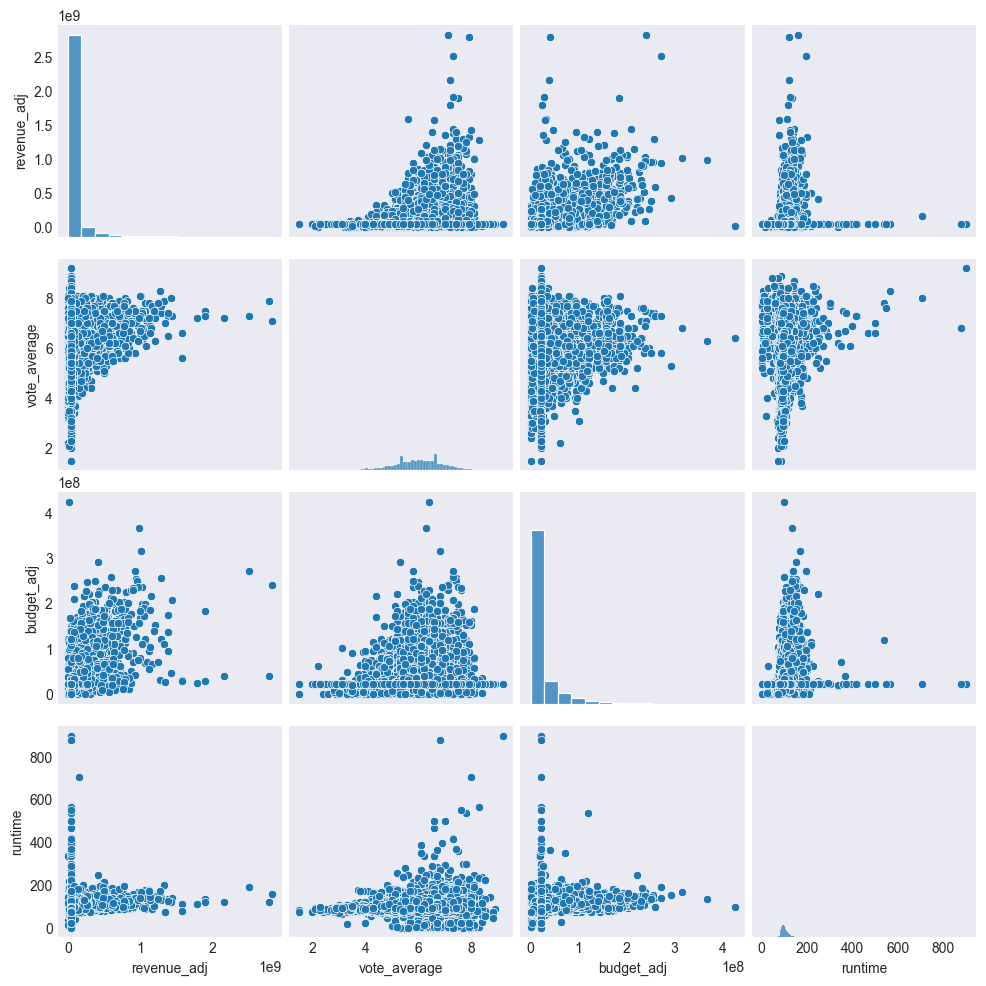

In [13]:
# select my relevant numeric columns for the pair plot
numeric_columns = ['revenue_adj','vote_average', 'budget_adj', 'runtime']

#creating the pair plot
sns.pairplot(df_cleaned[numeric_columns], diag_kind='hist')
plt.show()

<a id='conclusions'></a>
## Conclusions

### Original Research Questions
1. What are the most popular genres over time?
2. What factors influence movie revenue?
    - Investigating budget, vote average, and runtime in relation to revenue.

### Summary of Findings
1. **Most Popular Genres:** Drama, Comedy, and Thriller are the most common movie genres.
2. **Budget & Revenue:** Higher budget movies tend to have a higher revenue with a correlation of .59.
3. **Runtime and Revenue:** Longer movies do not strongly impact revenue, there is a .16 correlation.
4. **Vote Average & Revenue:** Highly rated movies have a weak correlation of .17 with revenue.

### Limitations
- Correlation does not imply causation.
- External factors such as marketing, and franchise popularity are not accounted for.
- Budget and revenue figures are adjusted for inflation, however trends could shift over time.

### Further Research 
- This dataset primarily focuses on box office sales, while that remains a reliable metric, a significant portion of earning are now earned through streaming platforms. How would the data and results look different if the information from the biggest streaming companies like Netflix, Disney+, and Prime Video, was also incorporated into this analysis?

In [14]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb